Date created: 3/18/2020 <br>
Author: Gargeya Vunnava <br>
github username: gargeyavunnava <br>

##### Importing relevant Python libraries
1. matplotlib to save plots
2. pandas to work with pandas series and dataframes
3. numpy to work with arrays
4. urllib to download data directly using url

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import pandas as pd
from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',15) 

Using '%pylab inline' to show inline plots in the jupyter notebook file

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Accessing the data from URL and loading it to a variable called 'sample_file'

In [3]:
sample_file = urllib.request.urlopen('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii')

Loading the downloaded data into a numpy object called 'ao'

In [4]:
ao = np.loadtxt(sample_file)

Acceccing specific rows of 'ao'

In [5]:
ao[0:2]

array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01]])

Creating a data index to be used for the pandas series. Date range starts from 1950-01, frequency is monthly, and the no of time stamps (or 'periods') is equal to the no of rows in 'ao' (given by ao.shape[0])

In [6]:
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

Creating a pandas serires object called 'AO' with values set to the 3rd column (index=2) of 'ao' and index as dates

In [7]:
AO = Series(ao[:,2], index=dates)

Plotting the AO data and saving it to file

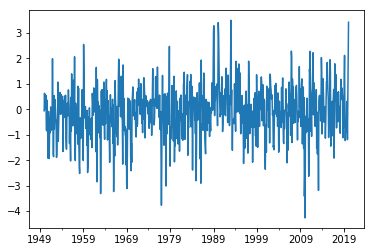

In [8]:
AO.plot()
plt.savefig('Daily Atlantic Oscillation (AO) plot.png') #saving plots as png

Accessing the second data set from URL and loading it to a variable called 'sample_file2'

In [9]:
sample_file2 = urllib.request.urlopen('http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii')

Loading the data from 'sample_file2' into a numpy object called 'nao'

In [10]:
nao = np.loadtxt(sample_file2)

Creating another pandas series object called 'NAO' similar to the previous one

In [11]:
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
NAO = Series(nao[:,2], index=dates_nao)

Creating a pandas DataFrame object from the two pandas series objects with dates as index

In [12]:
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})

Plotting both series in the dataframe as subplots in the same plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000931B7F0>,
      dtype=object)

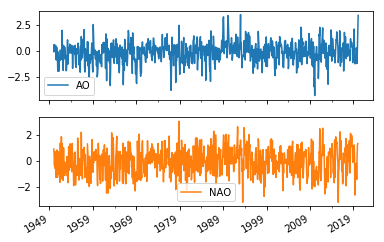

In [13]:
aonao.plot(subplots=True)

Using the describe function of pandas to show different statistical properties of the data in dataframe

In [14]:
aonao.describe()

,AO,NAO
count,842.000000,841.000000
mean,-0.099993,-0.002171
std,1.009606,1.021176
min,-4.265700,-3.180000
25%,-0.651515,-0.750000
50%,-0.037124,0.060000
75%,0.485400,0.720000
max,3.495300,3.040000


Resampling data to a different frequency based on median

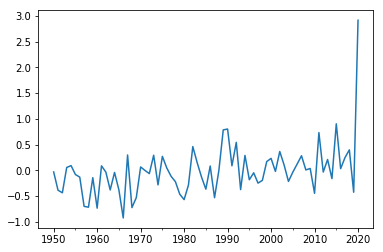

In [15]:
AO_mm = AO.resample("A").median()
AO_mm.plot()
plt.savefig('Annual median values for AO.png') #saving plots as png

A rolling mean plot for both AO and NAO data

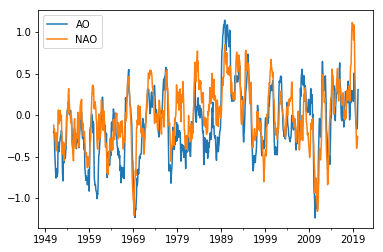

In [17]:
graph = aonao.rolling(window=12, center=False).mean().plot()
plt.savefig('Rolling mean for both AO and NAO.png') #saving plots as png